# Online Payments Fraud Detection with ML



### Description of Dataset
Link = https://www.kaggle.com/datasets/ealaxi/paysim1/download?datasetVersionNumber=2

To identify online payment fraud with machine learning, we need to train a machine learninf model for classifying fraudulent and non-fraudulent payments. For this we need a dataset containing information about online payment fraud, so that we can understand what type of tranctions lead to fraud.

Below are all the columns from the dataset I'm using here:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amountof the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balancse before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load dataset 
data = pd.read_csv("C://Users//Administrator//Desktop//Datasets//credit card_data.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.shape

(1048575, 11)

In [10]:
# Exploring transaction type
type_data = data['type'].value_counts()

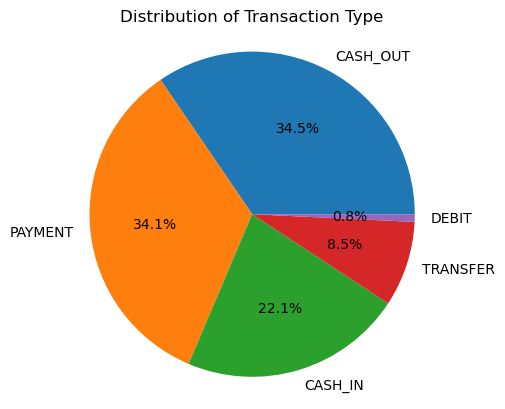

In [34]:
plt.style.use('default')
plt.pie(type_data,autopct='%1.1f%%',labels=type_data.index, radius=1.1 )
plt.title('Distribution of Transaction Type', size=12)
plt.show()

In [35]:
# Checking correlation
correlation = data.corr()
correlation['isFraud'].sort_values(ascending=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6944\4222434981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


isFraud           1.000000
amount            0.044809
oldbalanceOrg     0.005465
newbalanceDest   -0.001017
step             -0.003390
oldbalanceDest   -0.004259
newbalanceOrig   -0.007322
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [36]:
data['type'] = data['type'].map({'CASH_OUT':1, 'PAYMENT':2,
                                'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

data['isFraud'] = data['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [37]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


## Online Payments Fraud detection model

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X  = np.array(data[['type','amount','oldbalanceOrg','newbalanceOrig']])
Y = np.array(data[['isFraud']])

In [40]:
# Training a machine learning model

from sklearn.tree import DecisionTreeClassifier


In [41]:
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


In [42]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(model.score(x_test, y_test))

0.9995994570417678


In [44]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.73      0.66      0.69       213
    No Fraud       1.00      1.00      1.00    314360

    accuracy                           1.00    314573
   macro avg       0.86      0.83      0.84    314573
weighted avg       1.00      1.00      1.00    314573



In [49]:
# Prediction
# Feature = [type, amount,oldbalanceOrg,newbalanceOrig]

features = np.array([[4,9000.60,9000.60,0.0]])
print(model.predict(features))

['No Fraud']
